# ***Medical Data Visualizer***


The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. 

You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.


| Feature | Variable Type | Variable      | Value Type |
|:-------:|:------------:|:-------------:|:----------:|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

#### ***Tasks***

Create a chart similar to `examples/Figure_1.png`, where we show the counts of good and bad outcomes for the `cholesterol`, `gluc`, `alco`, `active`, and `smoke` variables for patients with cardio=1 and cardio=0 in different panels.

Use the data to complete the following tasks:
* Add an `overweight` column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
* Normalize the data by making 0 always good and 1 always bad. If the value of `cholesterol` or `gluc` is 1, make the value 0. If the value is more than 1, make the value 1.
* Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. The chart should look like `examples/Figure_1.png`.
* Clean the data. Filter out the following patient segments that represent incorrect data:
  - diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
  - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
  - height is more than the 97.5th percentile
  - weight is less than the 2.5th percentile
  - weight is more than the 97.5th percentile
* Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's `heatmap()`. Mask the upper triangle. The chart should look like `examples/Figure_2.png`.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('medical_examination.csv')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### **Adding an overweight column to the data.** 

*To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.*

In [17]:
height_in_meters = df['height']*0.01 #converting height to m from cm

bmi = df['weight']/(height_in_meters)**2 #calculating BMI

bmi.loc[bmi < 25] = 0 #normalizing BMI to 0 if value is inferior to 25
bmi.loc[bmi >= 25] = 1 #normalizing BMI to 1 if value is equal or greater than 25

df['overweight'] = bmi #adding the generated column to the DataFrame.

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.0


### **Normalizing the data by making 0 always good and 1 always bad.**

*If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.*

In [18]:
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0 #normalizing cholestrol column values -> loc[subset index,subset columns]
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1 #normalizing cholestrol column values -> loc[subset index,subset columns]

df.loc[df['gluc'] == 1, 'gluc'] = 0 #normalizing gluco column values -> loc[subset index,subset columns]
df.loc[df['gluc'] > 1, 'gluc'] = 1 #normalizing gluco column values -> loc[subset index,subset columns]


In [19]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


###**Convert the data into long format and create a chart split by cardio.**

*Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot().*

*The dataset should be split by 'Cardio' so there is one chart for each cardio value. The chart should look like examples/Figure_1.png.*

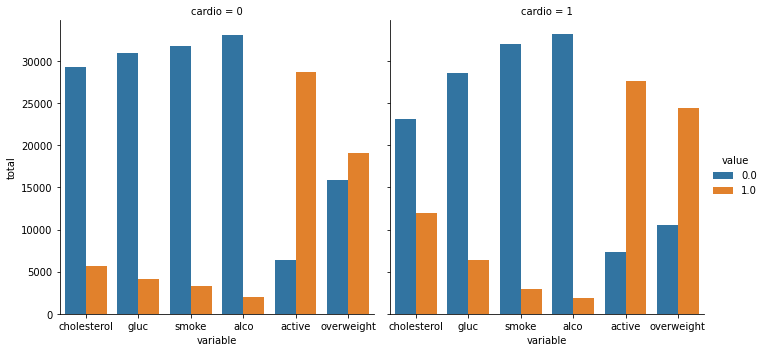

In [20]:
#id_vars speficifies which colums to keep as the MAIN
#value_vars which columns to keep for the long data transformation, otherwise it will convert the entire table.

melted_df = df.melt(id_vars='cardio', value_vars=['cholesterol','gluc',	'smoke',	'alco', 'active',	'overweight'], var_name='variable') #pd.melt() transforms wide data to long. We keep cardio column and unpivot the other columns to rows

fig = sns.catplot(x="variable", hue="value", col="cardio", data=melted_df, kind='count')
fig.set_axis_labels("variable", "total")

fig.savefig('catplot.png')



### **Clean the data**

*Filter out the following patient segments that represent incorrect data:*
  - *diastolic pressure is higher than systolic (Keep the correct data with* `(df['ap_lo'] <= df['ap_hi'])`)
  - *height is less than the 2.5th percentile (Keep the correct data with* `(df['height'] >= df['height'].quantile(0.025))`)
  - *height is more than the 97.5th percentile*
  - *weight is less than the 2.5th percentile*
  - *weight is more than the 97.5th percentile* 

In [21]:
print(f'Before: {df.shape}')

df = df[(df['ap_lo'] <= df['ap_hi'])]
df = df[(df['height'] >= df['height'].quantile(0.025)) & (df['height'] < df['height'].quantile(0.975))] #keeping only height values where height is bigger than the 2.5th percentile AND values below 97.5%.
df = df[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] < df['weight'].quantile(0.975))] #keeping only weigth values where weigth is bigger than the 2.5th percentile AND values below 97.5%.

print(f'After: {df.shape}')

Before: (70000, 14)
After: (61856, 14)


###**Create a correlation matrix using the dataset**

*Plot the correlation matrix using seaborn's heatmap(). Mask the upper triangle.*

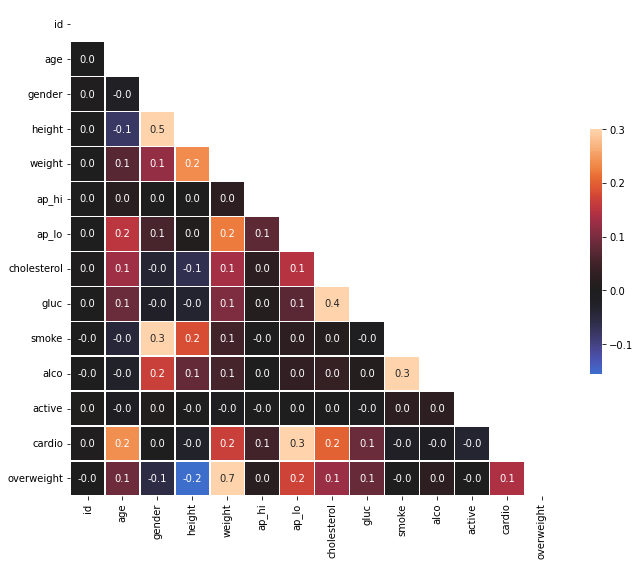

In [25]:
correlation = df.corr()

mask = np.triu(np.ones_like(correlation, dtype=bool))
    
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with 'sns.heatmap()'
graph = sns.heatmap(correlation,ax=ax, mask=mask, vmax=.3, center=0,square=True, linewidths=0.3,annot= True,fmt = '.1f',cbar_kws={"shrink": .5}) # ploting heatmap

fig = graph.figure